<a href="https://colab.research.google.com/github/TokaAyman/NLP_ITI/blob/main/L3_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

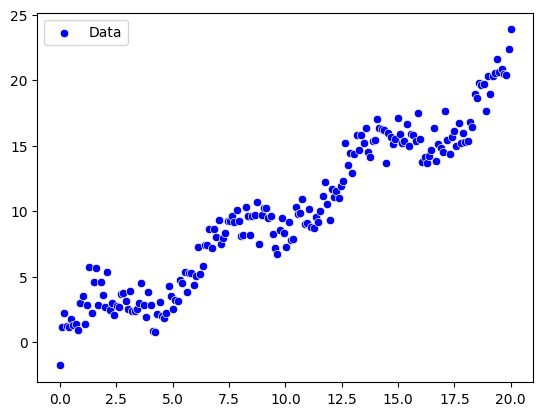

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([-1.7841]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[7.5095]])]

In [215]:
model_2 = nn.Sequential(
    nn.Linear(1,512),
    nn.ReLU(),
    nn.Sigmoid(),
    nn.ReLU(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,1)  # regression output
)

In [216]:
loss_fn = nn.MSELoss()

In [217]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [218]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [219]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [220]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=10
                )


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.201756000518799
277.44815492630005
537.6110577583313
537.6977161169052
537.8509287685156
537.9467196688056
915.8272738680243
939.2779822573066
957.1268382295966
977.635697863996
1028.7956938967109
1036.6488113626838
1038.5036617740989
1190.491729401052
1379.040542267263
1520.1180721744895
1529.0666405186057
1532.8449505791068
1633.5651196464896
1685.025961779058
2038.4612034782767
2044.6186856254935
2300.6769741997123
2538.22600068897
2732.268755815923
2863.805285356939
2885.6523350700736
2911.8233441337943
2916.0684136375785
2916.364605627954
2917.9600010737777
2932.575829587877
3137.8120509013534
3148.2696734294295
3165.557787977159
3165.5581394573965
3170.2338959118642
3216.141004218749
3225.4423300167837
3242.3628088375845
3330.5082327267446
3333.9102231404104
3405.9159299275198
3452.759840144805
3682.4862653157033
3789.2660275837698
3888.1479169270315
3920.032362117461
3932.9469834706106
3971.2836495777883
3985.564082278899
4000.071858539275
4101.459004535369
4105.728982104949
4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

100.26480102539062
308.45489501953125
338.8021869659424
338.83016013912857
444.2711391430348
447.757335184142
453.6219797115773
455.359398720786
463.305066941306
463.79732969217
474.76206472329795
488.1950443070382
494.1481907647103
518.205903319642
522.9367778580636
524.3069547694176
582.1442655604333
582.217931529507
584.8057668413967
595.5760467257351
610.6152913775295
652.7735860552639
680.642024775967
721.3128354754299
744.9843709673733
758.5156152453274
765.0281245913357
765.9949382748455
779.1306976284832
815.4302963223308
875.4922355618328
891.4407180752605
893.7866977658123
895.0663755144924
924.6706273760647
927.1691341605037
942.5614004340023
965.7179212775081
1012.616011640057
1013.0937378015369
1026.5173656549305
1027.1406597103924
1031.96041383408
1033.4435032811016
1033.7494726087898
1048.3738412763923
1075.5845823194832
1085.0032396223396
1220.6311540510505
1223.737734546885
1256.6610934641212
1260.9891974832863
1271.6396844293922
1354.4979836847633
1368.5906283762306
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.19497714936733246
22.71021305024624
27.252967700362206
41.02793203294277
80.1831139177084
81.74955175817013
83.85564802587032
83.98778608441353
89.73322036862373
98.5483925640583
135.2932007610798
230.07695320248604
453.7023041546345
507.07950523495674
515.4707377254963
515.4999814983457
519.4258197303861
520.7787883039564
527.2939898725599
533.3083688970655
547.3638851400465
615.5386440511793
615.5646964218467
703.6460028793663
727.5289641525596
727.5614865999669
728.0136099737138
729.2377768438309
730.5126180332154
735.1399445217103
737.8009218852967
737.9393284004182
768.3583328407258
793.7655708473176
795.5649686735123
808.0193973463029
810.1547685544938
823.1146617811173
850.1006828229874
954.9364448469132
1052.1704612653702
1081.811347572133
1085.0971814077348
1085.1692559104413
1091.11785906367
1112.7508050780743
1158.679813561961
1159.1569828968495
1165.137712476775
1200.6741962414235
1202.3495718222111
1220.3212705831975
1220.4325557556003
1232.0665613021702
1242.70671709440

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

18.849544525146484
25.35957670211792
42.48286581039429
49.400699615478516
60.241055488586426
65.86069011688232
65.86679676221684
68.90373566793278
73.84347441839054
90.90897086309269
105.68660357641056
105.72320780949667
115.3731349487789
125.11077056126669
128.06675086217
135.970767356921
138.2620030422695
168.69268617825583
237.22128114895895
312.62660799222067
314.1643830318935
381.30067453579977
397.6177979488857
397.6544155483134
448.64724391745403
450.1263349656947
453.98139005945995
458.0987663869746
464.39477974222973
477.70121914194897
493.8015151624568
494.20808899449185
498.71640121983364
498.7276894315146
499.20744992932305
499.41379502555355
499.44919380685315
513.4537857486866
518.5751598789357
522.6685183956288
523.561458082404
528.9000892355107
547.3076419546269
547.3547379947267
549.3237906671129
550.5131636834703
563.0141688561998
568.6467334008776
569.0481367385946
569.0586981358938
574.6893343511038
576.7296256604604
582.849560696166
583.1117135765962
585.6479982617

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.665531158447266
54.588035583496094
70.05325889587402
70.05792352650315
95.96295663807541
166.21013376209885
167.4511594483629
224.7080716798082
227.80320236179978
228.0201767096296
228.28454619739205
244.06660491321236
307.81340819690377
337.87468749377877
342.19586402270943
343.37002366874367
347.77425140235573
350.52053111884743
358.4158214936033
372.58315414283425
410.07502120826393
440.4560522446409
440.9129310557619
450.81663760636
463.5555911967531
463.5576424666215
464.72101617534645
465.97941172798164
466.98346603591926
467.0273536213208
516.3354018696118
528.985464430647
550.5397761829663
556.9344490536023
557.0413968556095
560.5424351685215
561.8578764193226
589.6622415774036
589.8578665100504
590.2931617342401
598.2285774790216
598.240096612135
624.2060351802502
628.6221008731518
630.1061904861126
631.1428574754391
631.1428600576992
633.4507013586635
633.5805985954876
642.9920604256267
667.165720703947
668.1714892414684
668.9369590309734
669.2070944932575
669.2076981541404

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0823008269071579
0.18682827055454254
7.246642246842384
18.96823514997959
19.88182993233204
22.29609651863575
23.358751013875008
46.85373277962208
71.33783312141895
105.4176404029131
149.53369112312794
154.10391350090504
154.50303857028484
163.36845986545086
179.0268279761076
179.03153520356864
180.02637427579612
191.30344622861594
198.21849578153342
204.90424197446555
207.55520432721823
232.5452212644741
251.3239020658657
251.44800100754946
253.41770039033145
259.2429328961298
261.00347123574466
267.3127149147913
273.79692397546023
291.0367444558069
300.2219775719568
300.25516275595874
300.25902860960923
302.3897947629448
325.20899909338914
360.5798525174614
393.50033515295945
395.75670545897447
398.7752129395958
399.30619251332246
400.4308004339691
400.45041268109344
400.56160624860786
402.4993477666285
423.9916992986109
495.74922951101325
564.6721802556422
635.4167862737086
653.9529991948511
729.1737328374293
761.0957489812281
761.3867617750075
775.705788722029
776.8212565088179
77

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.132477879524231
2.3551864624023438
6.124351978302002
7.634207844734192
8.046511709690094
9.115875661373138
12.38349336385727
20.757973611354828
20.803533475846052
51.16721908375621
51.17853162623942
66.99617002345622
76.5521993432194
87.98001764155924
93.12547109462321
123.7021484170109
126.74718973971903
133.3416783604771
133.5038310084492
134.38616530038416
152.00840345956385
152.017366014421
153.6331910714507
154.03822910040617
154.90746503323317
155.4703416749835
177.30665492266417
240.05849742144346
271.44825648516417
306.316863052547
332.42614268511534
334.79384707659483
351.70673655718565
352.25927179306746
352.2740936651826
360.79548267275095
360.8153254445642
369.45897359214723
372.2891842778772
378.2588245328516
378.37874501012266
388.48786919377744
408.034673621878
459.67454331181943
460.33039914630353
500.23644696734846
501.15924542210996
518.3901662137359
522.0377082135528
549.7284812238067
551.9859546925873
552.7336984183639
565.5215850379318
567.5829794909805
574.59189

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.735637664794922
31.76735496520996
44.75821018218994
54.42606163024902
62.55778884887695
66.92006158828735
67.20725357532501
84.86346161365509
105.03533661365509
105.08303923532367
112.76508994027972
140.96153922006488
151.3973197452724
158.0728830806911
159.68578846380115
167.61541874334216
179.45275242254138
192.14375145360827
192.152541231364
197.79432160779834
204.22851664945483
204.4634287469089
213.73320127651095
217.38060403987765
220.16308976337314
220.330808814615
220.4058211632073
220.70278545096517
226.91933723166585
255.138153988868
256.0862105078995
277.1105253882706
287.95556284859776
289.8252052254975
293.3054253049195
293.45075880363584
293.89568700268865
294.5419433899224
296.9119647331536
298.6485701389611
316.921410638839
343.2005167789757
343.7189020700753
345.34510012343526
345.9464224167168
346.5287115164101
346.73472664132714
349.03123876824975
349.2366383858025
349.2532300762832
351.3727838806808
358.8106248192489
367.74145291373134
369.5432290844619
398.605933

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6449981331825256
9.328669130802155
9.663681000471115
64.25102230906487
69.44569727778435
77.98879572749138
79.20997986197472
79.26809473708272
83.10440583899617
90.93706556037068
131.40568586066365
133.17219360545278
160.85241897776723
169.5858441181481
169.61120263673365
169.6750015411526
172.00746003724635
191.37952653504908
300.3539451751858
360.58698121644557
398.29180757142603
410.97666398622096
419.3758958969265
419.38999346178025
419.60116336029023
425.868312808685
427.09253618400544
431.1296069351956
433.38928196113557
433.39045060332865
433.61069961544126
435.80059572216123
455.04827257152647
460.1774730300531
460.73717840667814
460.74716208688915
468.4591395687312
468.5764475967735
469.59256516955793
475.4083987381309
521.1861468460411
550.0224467422813
550.1220232676715
561.4024388026446
561.5766523163766
578.9847696106881
583.8400466721505
583.8408585734433
596.872798079974
598.8141974158352
598.9245137445396
599.8169795147842
603.6310566536849
606.7322872750228
626.31089

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0010378292063251138
4.874954932020046
4.874959378103995
4.906273371140742
6.501489406983637
6.502020635766712
22.20461825386974
30.337636747522083
32.187606730622974
34.13269917027446
38.50457588688823
39.7658843185136
67.18113128201458
114.19498244778606
123.25338737027141
142.40401069180461
152.65162173764202
153.14956814901325
154.25999648229572
157.52163512365314
157.52194293341836
165.1127513249894
168.25141843161782
168.28859709329208
170.49748347825607
170.61042463905414
170.6724611794134
180.72911134115657
181.18534448496303
186.90125444284877
190.62395456186732
206.76654413095912
210.57433679453334
253.29933526865443
255.00264730802974
264.2671822582861
264.4723662709375
264.4747856732947
271.5156129476172
273.2607439633948
278.8236960050208
278.8951359343273
279.7721799564106
279.92618973073786
297.16560966787165
310.3769505721075
310.9257456761343
311.47161347684687
322.20328385648554
323.9148230057699
325.89531631288355
327.0734356146795
330.08418900785273
333.28398496923

In [221]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

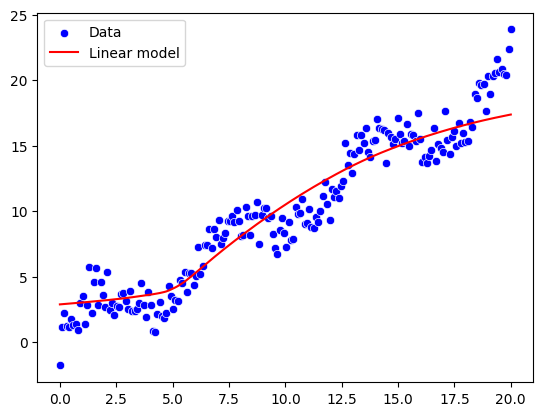

In [222]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
